In [1]:
from model import SimpleUnet
import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
from torchvision import datasets, transforms, models
from torchinfo import summary
import torchvision.transforms as T
import numpy as np
from torch.nn.functional import relu
import tqdm
from tqdm import tqdm
import math



def samples(weights):
    device = 'cuda' 
    model =  SimpleUnet()
    model.load_state_dict(torch.load(weights))


    model = model.to(device)

    timesteps = 300
    betas = torch.linspace(0.0001, 0.02, timesteps)
    cumm_prod = torch.cumprod((1.-betas),-1)


    with torch.no_grad():    
        samp = torch.randn((5, 3, 64, 64)).to(device)
        
        
        for step in range(300-1, -1, -1):
            t_tensor = torch.tensor([step], device=device).long()
            pred_noise = model(samp, t_tensor)
            z_noise = torch.randn((5, 3, 64, 64)).to(device)
            
            alpha_t = 1. - betas[step]
            beta_t = betas[step]
            denom = torch.sqrt(1. - cumm_prod[step])
            
            samp = (1 / torch.sqrt(alpha_t)) * (samp - (beta_t / denom) * pred_noise)
            
            if step > 0:
                sigma_t = torch.sqrt(beta_t)
                
                samp += sigma_t * z_noise
            
            if step%60==0 or step==0:
                ind = step-1 if step>0 else 0
                
                fig, axes = plt.subplots(1, 5, figsize=(10, 10))
                for i in range(5):
                    ax = axes[i]
                    img = (samp[i] + 1) / 2  
                    img = img.clamp(0, 1).cpu()
                    fig.add_subplot(ax)
                    ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))
                    ax.axis('off')
                    
                plt.show()
    

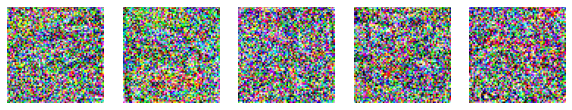

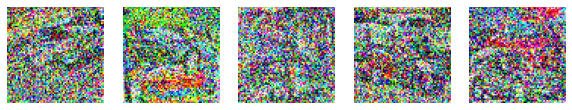

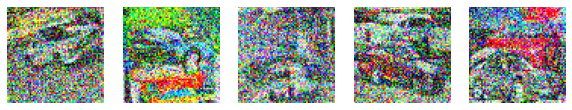

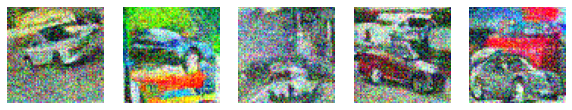

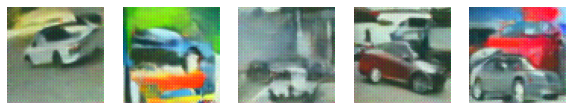

In [2]:
samples('unet_model300steps_500epochs_pos_embedding.pth')